In [4]:
from model import Classifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
clf = Classifier(1, RandomForestClassifier())

In [6]:
#stop word sets specified for this data set
path = "../data/stop_words_imbd/"
with open(path+"stop_words_no_nums.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_no_nums = frozenset(content)
with open(path+"stop_words_with_nums.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_with_nums = frozenset(content)

In [7]:
params_trial_1 = {
                'vect__max_features': ([10000, 15000]),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
                'tfidf__norm': (['l2']),
                'clf__n_estimators': ([200]),
                'clf__criterion': ['gini'],
                'clf__max_depth': (1000, 5000)
}

clf.fit(params_trial_1,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:  4.6min remaining:   49.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.7min finished


done in 326.592s

scores!
mean: 0.647 std: (+/-0.018) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 200, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.648 std: (+/-0.024) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 200, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.652 std: (+/-0.016) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 200, 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.655 std: (+/-0.021) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 200, 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.650 std: (+/-0.012) for {'clf__criterion': 'gini', 'clf__max_depth': 5000, 'clf__n_estimators': 200, 'tfidf__norm': 'l2', 

In [8]:
clf.eval_best_n_params(0.8)

Finding most common params for the top 2 values
[{'gini': 2}, {1000: 1, 5000: 1}, {200: 2}, {'l2': 2}, {15000: 2}, {(1, 1): 2}, {1: 1, 0: 1}]


In [16]:
params_trial_2 = {
                'vect__max_features': ([10000]),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
                'tfidf__norm': (['l2']),
                'clf__n_estimators': (200, 500),
                'clf__criterion': (['gini']),
                'clf__max_depth': (5000, 10000)
}

clf.fit(params_trial_2,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:  7.0min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  8.2min finished


done in 588.070s

scores!
mean: 0.647 std: (+/-0.016) for {'clf__criterion': 'gini', 'clf__max_depth': 5000, 'clf__n_estimators': 200, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.647 std: (+/-0.020) for {'clf__criterion': 'gini', 'clf__max_depth': 5000, 'clf__n_estimators': 200, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.652 std: (+/-0.016) for {'clf__criterion': 'gini', 'clf__max_depth': 5000, 'clf__n_estimators': 500, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.651 std: (+/-0.020) for {'clf__criterion': 'gini', 'clf__max_depth': 5000, 'clf__n_estimators': 500, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.649 std: (+/-0.015) for {'clf__criterion': 'gini', 'clf__max_depth': 10000, 'clf__n_estimators': 200, 'tfidf__norm': 'l2',

In [28]:
params_trial_3 = {
                'vect__max_features': ([10000]),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
                'tfidf__norm': (['l2']),
                'clf__n_estimators': (500, 750),
                'clf__criterion': (['gini']),
                'clf__max_depth': (10000, 12500)
}

clf.fit(params_trial_3,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed: 11.9min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 13.2min finished


done in 937.025s

scores!
mean: 0.651 std: (+/-0.017) for {'clf__criterion': 'gini', 'clf__max_depth': 10000, 'clf__n_estimators': 500, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.652 std: (+/-0.014) for {'clf__criterion': 'gini', 'clf__max_depth': 10000, 'clf__n_estimators': 500, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.653 std: (+/-0.018) for {'clf__criterion': 'gini', 'clf__max_depth': 10000, 'clf__n_estimators': 750, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.652 std: (+/-0.022) for {'clf__criterion': 'gini', 'clf__max_depth': 10000, 'clf__n_estimators': 750, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.650 std: (+/-0.017) for {'clf__criterion': 'gini', 'clf__max_depth': 12500, 'clf__n_estimators': 500, 'tfidf__norm': '

In [ ]:
params_trial_4 = {
                'vect__max_features': ([10000]),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_with_nums],
                'tfidf__norm': (['l2']),
                'clf__n_estimators': (750, 1200),
                'clf__criterion': (['gini']),
                'clf__max_depth': (12500)
}

clf.fit(params_trial_4,5)

In [6]:
params_trial_final = {
                'vect__max_features': ([10000]),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_with_nums],
                'tfidf__norm': (['l2']),
                'clf__n_estimators': ([750]),
                'clf__criterion': (['gini']),
                'clf__max_depth': ([12500])
}

clf.fit(params_trial_final,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.4min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished


done in 290.529s

scores!
mean: 0.652 std: (+/-0.016) for {'clf__criterion': 'gini', 'clf__max_depth': 12500, 'clf__n_estimators': 750, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
Best score:
0.652 (+/-0.016)
with parameters set:
	clf__criterion: 'gini'
	clf__max_depth: 12500
	clf__n_estimators: 750
	tfidf__norm: 'l2'
	vect__max_features: 10000
	vect__ngram_range: (1, 1)
	vect__stop_words: 0


Evaluation on test set:

Accuracy Score : 0.6078066914498141
Precision Score : 0.6078066914498141
Recall Score : 0.6078066914498141
F1 Score : 0.6078066914498141
Confusion Matrix
[[113   2   2   1   1   3   9  15   8   5   6   6   2  13  15  85  10   7
   10   6]
 [  1 230  35  10  10  33   7  12   6   7   3   4  10   2  14   1   1   0
    2   1]
 [  2  22 244  31  16  19   2  17   7   4   2   4   3   2   8   1   3   2
    4   1]
 [  1  12  41 226  26  14  13  11   1   4   2   2  32   1   5   0   0   0
    0   1]
 [  1   6  12  38 239   9  14  18   4   8   0   2  22   4   2   0   0   1
    3   2]
 [  2  33  44   8   9 255   5   9   1   3   1   5   7   3   6   0   1   1
    1   1]
 [  0   9   3  16  16   2 284  19   5   7   2   1   7   2   4   1   5   2
    4   1]
 [  6   5   5   4   2   8  14 269  21   5   2   1  22   3   7   3   7   3
    7   2]
 [  3   1   3   2   0   4   9  44 262  20   0   2  12   3   7   5   6   3
    8   4]
 [  1   3   2   3   0   2   1  26   8 298  32   2   1   

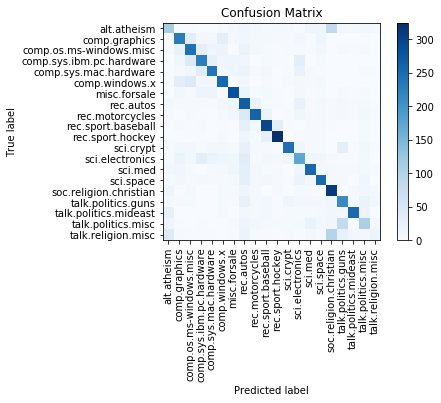

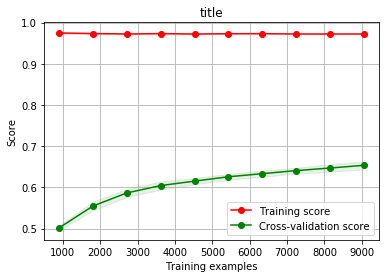

In [8]:
clf.eval_on_test([],False)
clf.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])